In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.sex.value_counts(),'\n',data.smoker.value_counts(),'\n',data.region.value_counts(),'\n',data.children.value_counts(),'\n')


male      676
female    662
Name: sex, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 



# replacing categorical variable with numericals

In [5]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southeast':0,'southwest':1,'northwest':2,'norteast':3})

In [6]:
data.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region      324
charges       0
dtype: int64

# Exploratory Data Analysis

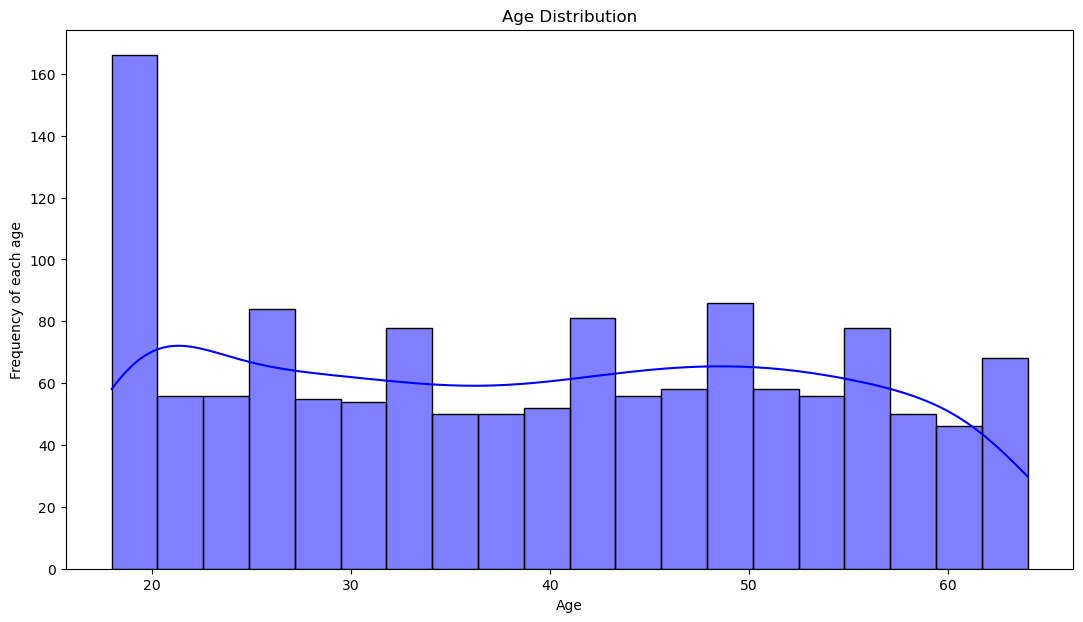

In [7]:
plt.figure(figsize=(13,7))
sns.histplot(data.age,bins=20,kde=True,color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each age')
plt.show()

****Maximum people in a dataset have a age below 20****

Text(0.5, 1.0, 'Gender Distribution')

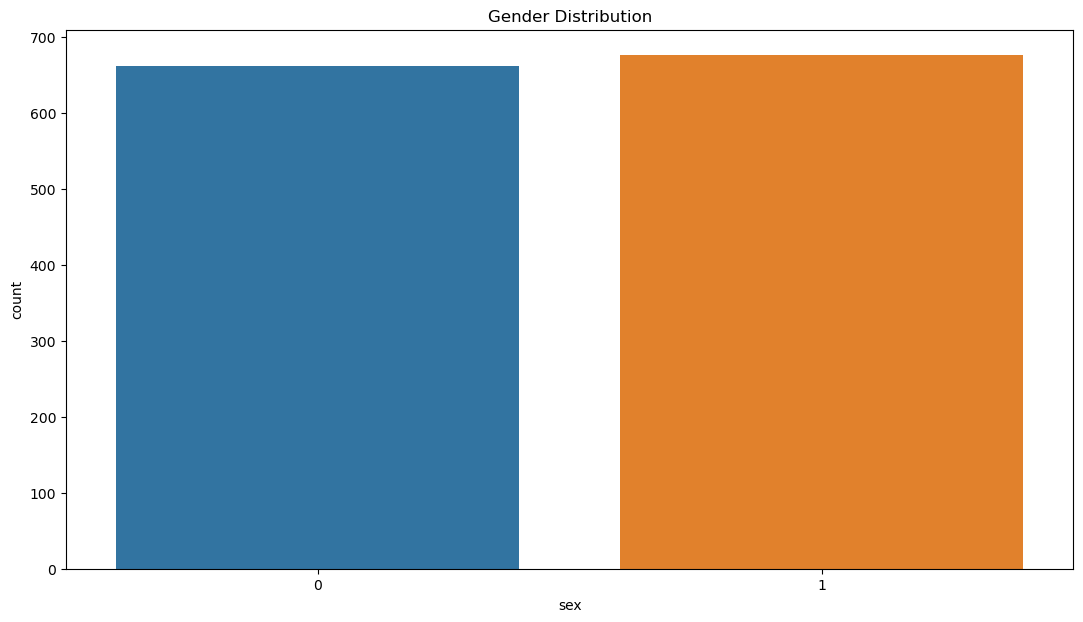

In [8]:
plt.figure(figsize=(13,7))
sns.countplot(x='sex',data=data)
plt.title("Gender Distribution")

****from the above graph we can conclude that male and female are almost equal****

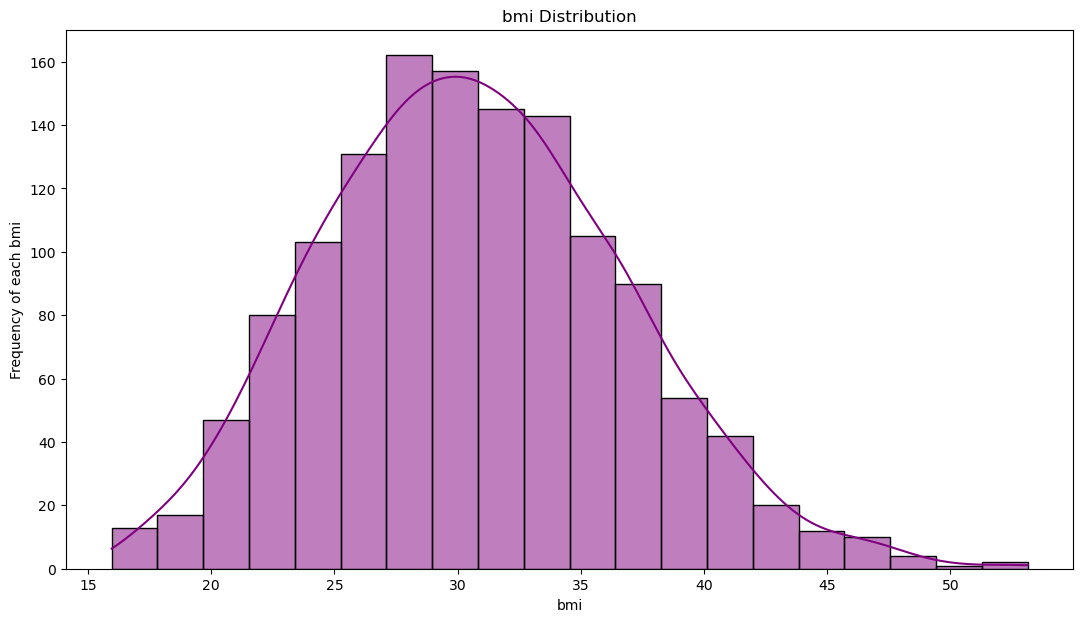

In [9]:
plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins=20,kde=True,color='purple')
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency of each bmi')
plt.show()

**the majority of the people have bmi in between 25 and 40, which is considered as overweight and could be a major factor in inncreasing the medical cost**

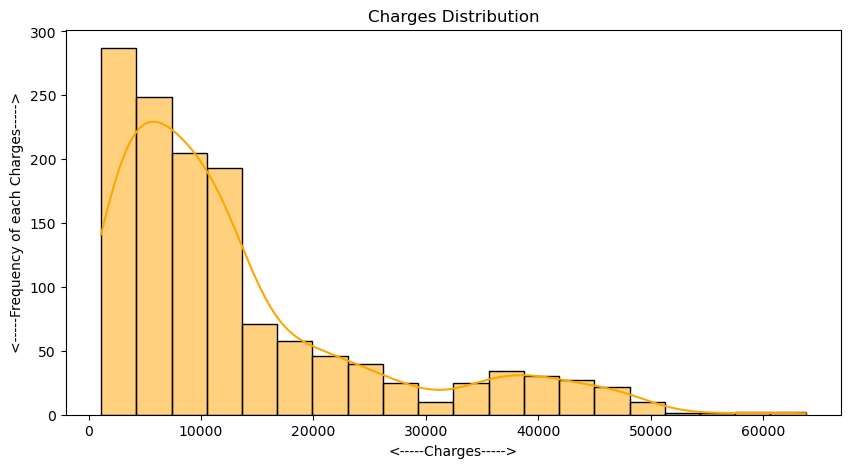

In [10]:
#checking charges Distribution
plt.figure(figsize=(10,5))
sns.histplot(data.charges, bins=20, kde=True, color='orange')
plt.title("Charges Distribution")
plt.xlabel("<-----Charges----->")
plt.ylabel("<-----Frequency of each Charges----->")
plt.show()

<Figure size 1000x500 with 0 Axes>

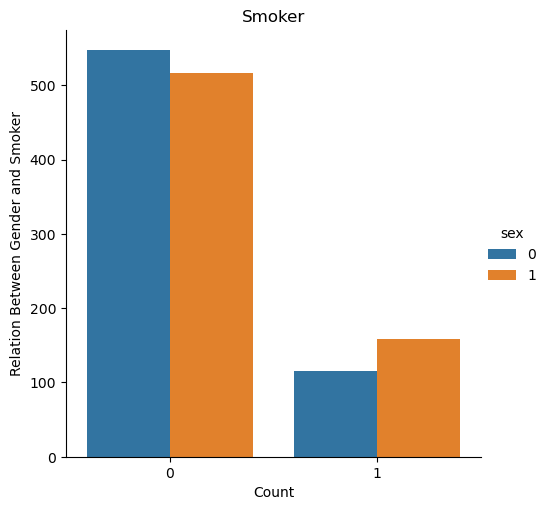

In [11]:
plt.figure(figsize=(10,5))
sns.catplot(x="smoker",kind="count",hue="sex",data=data)
plt.title("Smoker")
plt.xlabel("Count")
plt.ylabel("Relation Between Gender and Smoker")
plt.show()

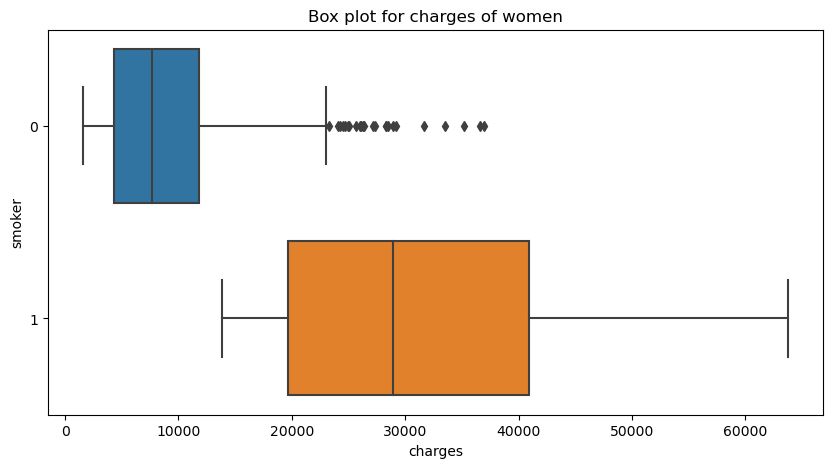

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(y="smoker",x="charges",data=data[(data.sex==0)],orient="h")
plt.title("Box plot for charges of women")
plt.show()

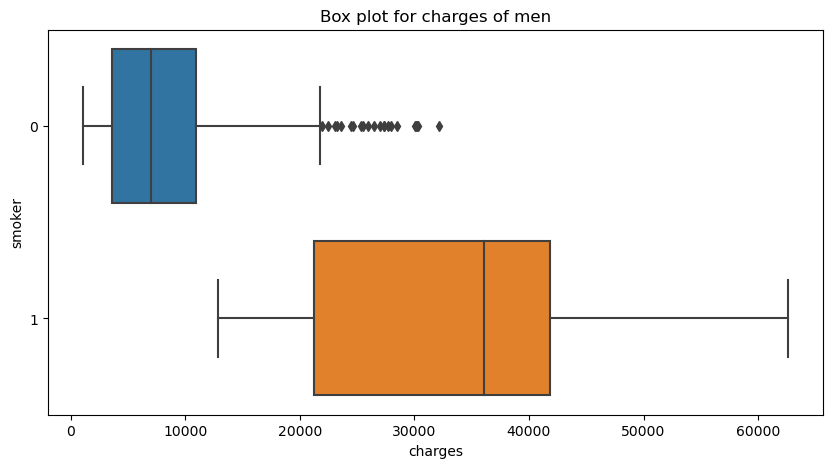

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(y="smoker",x="charges",data=data[(data.sex==1)],orient="h")
plt.title("Box plot for charges of men")
plt.show()

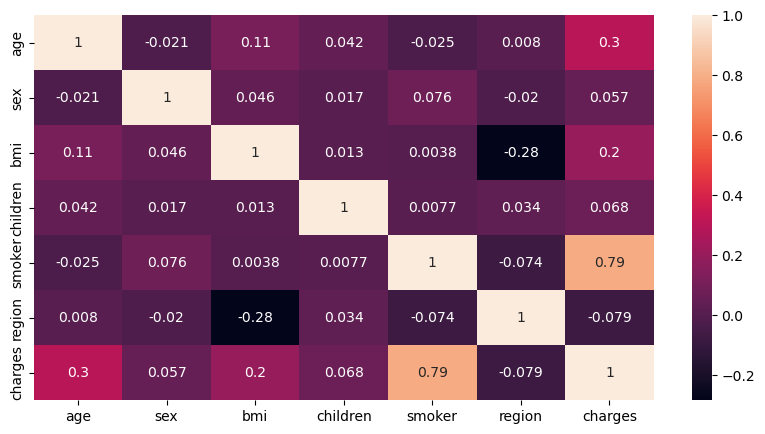

In [14]:
plt.figure(figsize=(10,5))
cor=data.corr()
sns.heatmap(cor, annot=True,)
plt.show()

**By observing above plot we can state that smokers has more medical expenses so it has a high impact on insurance charge followed by age and bmi whereas region,gender and children has no impact**

C:\Users\hp1\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1000x700 with 0 Axes>

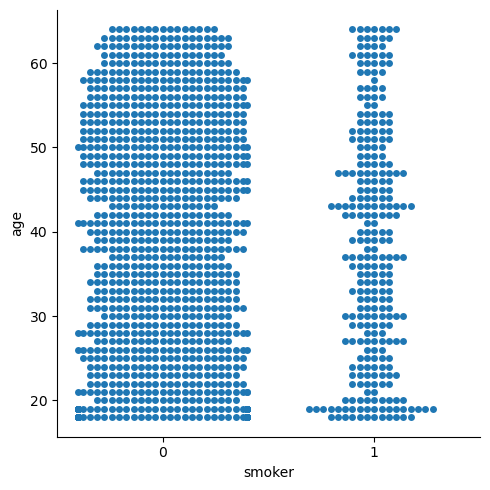

In [15]:
plt.figure(figsize=(10,7))
sns.catplot(x='smoker',y='age',kind='swarm',data=data)

**From the above graph,we can observe that there is significant number of smokers at the age 19**

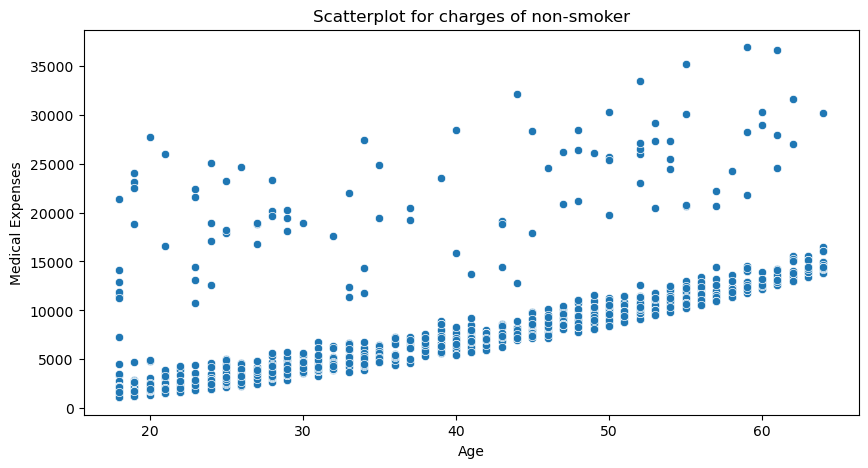

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(y="charges",x="age",data=data[(data.smoker==0)])
plt.title("Scatterplot for charges of non-smoker")
plt.ylabel("Medical Expenses")
plt.xlabel("Age")
plt.show()

**Majority of the points show that medical expenses increase with the age which may due to the fact that older people are more prone to illness.But there are some outliers which shows other illness or expenses which may lead to increase in medical expenses**

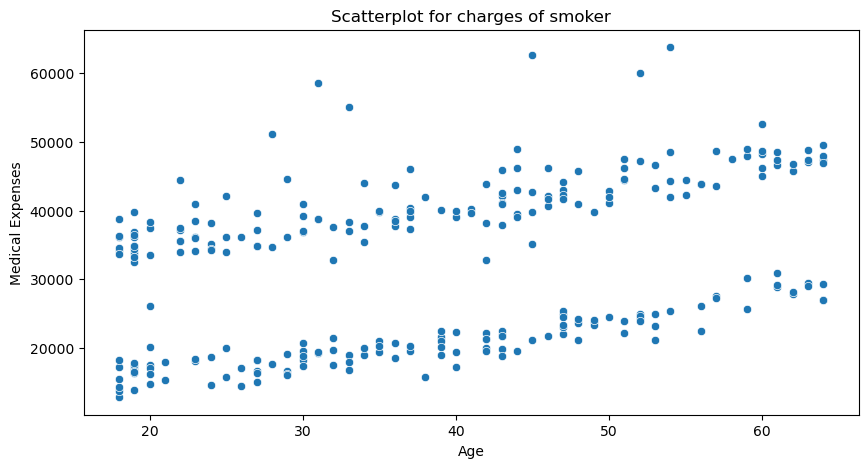

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(y="charges",x="age",data=data[(data.smoker==1)])
plt.title("Scatterplot for charges of smoker")
plt.ylabel("Medical Expenses")
plt.xlabel("Age")
plt.show()

**In this graph there are two segments,one with high medical expense which may due to the smoking related illness and other with low medicsl expense which may due to age related illness.

Now,in order to get more clear we can combine both the graphs**

<Figure size 2000x500 with 0 Axes>

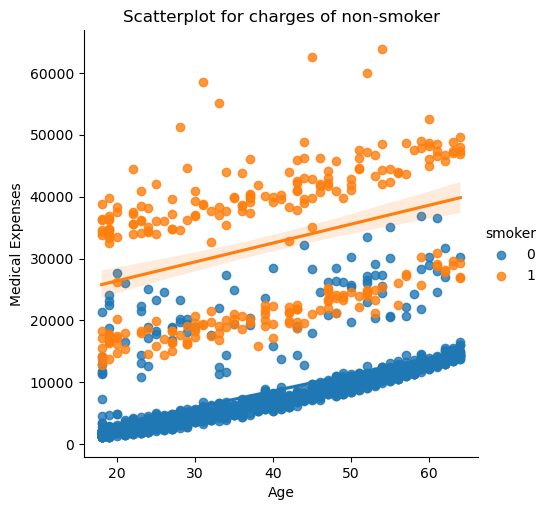

In [18]:
#Age Charges Distribution
plt.figure(figsize=(20,5))
sns.lmplot(y="charges",x="age",data=data,hue='smoker')
plt.title("Scatterplot for charges of non-smoker")
plt.ylabel("Medical Expenses")
plt.xlabel("Age")
plt.show()

Now,we can clearly understand the variation in charges with respect to age and smoking habbits. The medical expense of smokers is higher than that of non-smokers irrespective of age.In non-smokers,the cost of treatment increases with age which is obvious

C:\Users\hp1\AppData\Local\Temp\ipykernel_26984\2889816059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi>30)]['charges'])


Text(0.5, 0, 'Medical Expenses')

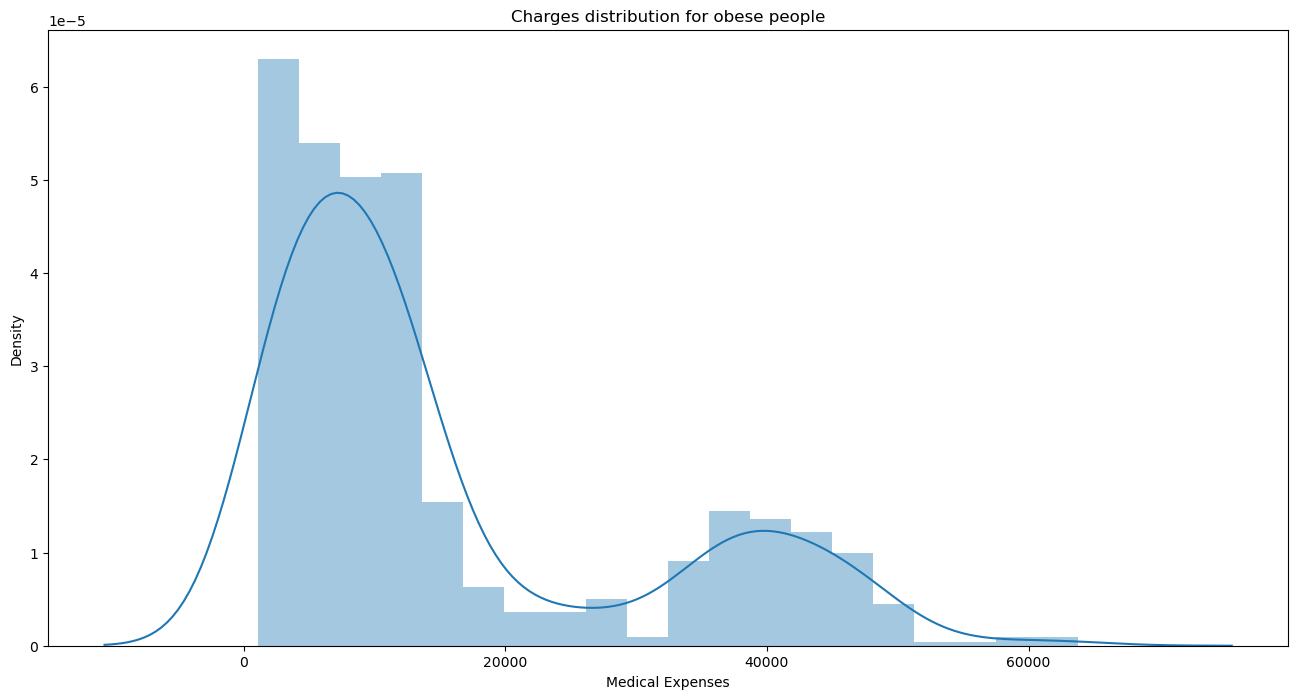

In [19]:
##Relation between BMI and Medical Expenses
plt.figure(figsize=(16,8))
sns.distplot(data[(data.bmi>30)]['charges'])
plt.title("Charges distribution for obese people")
plt.xlabel('Medical Expenses')

**Therefore,people with BMI less than 30 are spending less where as people with BMi more than 30 are spending more**

C:\Users\hp1\AppData\Local\Temp\ipykernel_26984\248252809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi<30)]['charges'])


Text(0.5, 0, 'Medical Expenses')

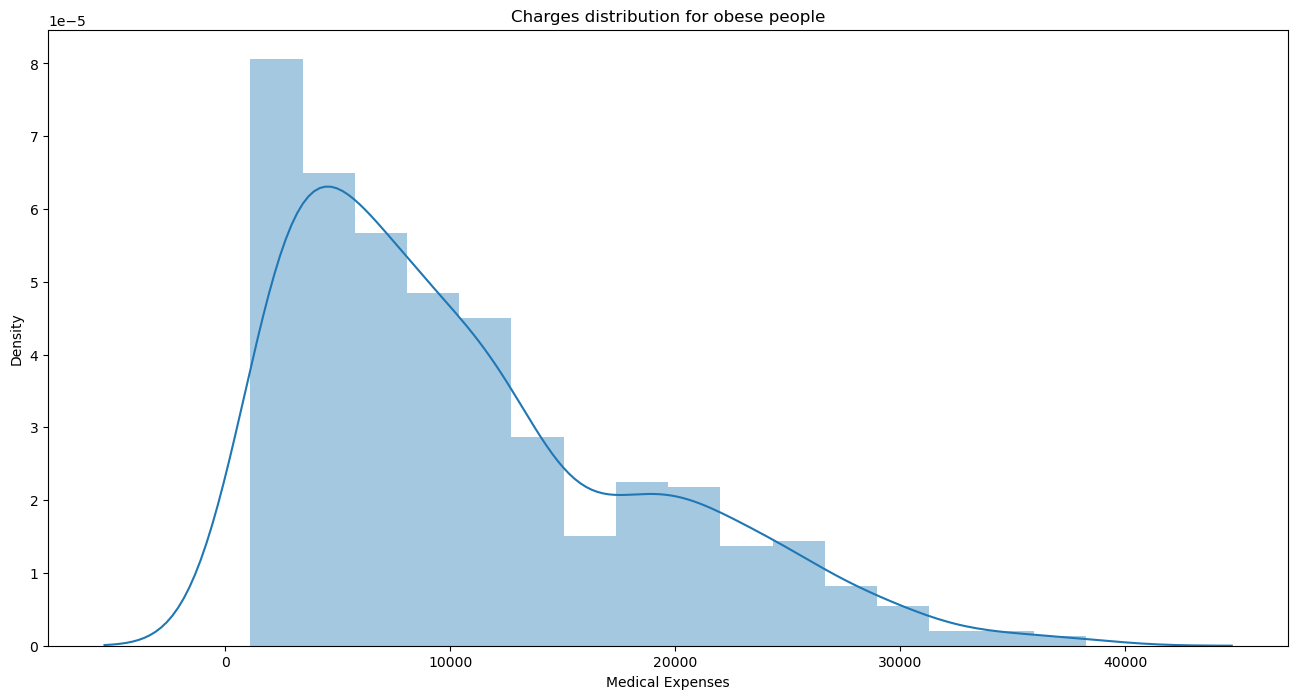

In [20]:
plt.figure(figsize=(16,8))
sns.distplot(data[(data.bmi<30)]['charges'])
plt.title("Charges distribution for obese people")
plt.xlabel('Medical Expenses')

**therefore, people with Bmi less than 30 are spending less where as people with Bmi more than 30 are spending more**


#  Model Building And Evaluation

***Liner Regression***

In [21]:
data.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region      324
charges       0
dtype: int64

In [22]:
data.drop('region', axis = 1, inplace = True)

In [23]:
X=data.drop('charges',axis=1)
y=data.charges

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1003, 5), (335, 5), (1003,), (335,))

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pr=reg.predict(X_train)

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, y_pr))
print('MSE:', metrics.mean_squared_error(y_train, y_pr))
print('R2 Score:', metrics.r2_score(y_train, y_pr))

MAE: 4199.926923359497
MSE: 36315560.97647379
R2 Score: 0.7494581711082073


In [29]:
y_pred =reg.predict(X_test)

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

MAE: 4180.786422973238
MSE: 37940112.46683447
R2 Score: 0.7486163979240839


# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [32]:
#transform the feature to higher degree 
X_train_poly=poly_reg.fit_transform(X_train)

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_train_poly,y_train,test_size=0.2,random_state=42)

In [33]:
#train the model
plr=LinearRegression()
plr.fit(X_train,y_train)


LinearRegression()

In [34]:
y_pred_plr=plr.predict(X_test)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('R2 Score:', metrics.r2_score(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))

MAE: 2968.067586616958
R2 Score: 0.7998931111191243
RMSE: 4852.834838876824


***My model is able to explain 80% of the data***

# Making a prediction System

In [36]:
#input the values
age=21
sex=1
bmi=27
children=0
smoker=1

In [37]:
charge=reg.predict([[age,sex,bmi,children,smoker]])
print('The charge of this new patient is $' ,charge[0])

The charge of this new patient is $ 25746.78028379006


C:\Users\hp1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score 

In [39]:
RidgeModel=Ridge()
RidgeModel#Ridge regression

Ridge()

In [40]:
#training model
RidgeModel.fit(X_train,y_train)

Ridge()